## **Does the difference between either money raised or money spent seem to influence the likelihood of a candidate winning a race?** ##

In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import os


## Cleaning DataFrame ##

In [25]:
pd.options.mode.copy_on_write = True
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [27]:
States_df = pd.read_csv('../data/States_df.csv')

In [29]:
States_df['Party'] = States_df['FirstLastP'].str.split(' ').str[-1].str.strip('()')

In [8]:
States_df = (
    States_df
    .rename(columns={'Incumbent':'x', 'Rcpts': 'Raised', 'Result': 'Outcome', 'CRPICO': 'Incumbent'})
)

In [9]:
data = States_df[['FirstLastP', 'State', 'District', 'Raised', 'Spent', 'Outcome', 'Party', 'Incumbent']]

In [10]:
data['Outcome'] = data['Outcome'].replace(' ', 'L')

In [11]:
data['Winner'] = (data['Outcome'] == 'W') | (data['Outcome'] == 'w')

In [12]:
data['Winner'] = data['Winner'].astype(int)

In [13]:
data['Difference'] = data['Raised'] - data['Spent']

In [14]:
df = data[['State', 'District', 'FirstLastP', 'Party', 'Raised', 'Spent', 'Difference', 'Outcome', 'Winner', 'Incumbent']]

In [15]:
df = df[df['Difference'] != 0.00]

## Descriptive Statistics ##

In [17]:
#df.to_csv('../data/States_clean_df.csv', index=False)

In [33]:
incomb_df = df.groupby(['State', 'Incumbent', 'Party', 'Winner']).agg({'Raised':'mean', 'Spent':'mean', 'Difference':'mean'}).reset_index()

In [35]:
incomb_df

,State,Incumbent,Party,Winner,Raised,Spent,Difference
0,Alabama,C,D,0,50273.20,40971.09,9302.11
1,Alabama,I,D,1,2168165.01,1495957.14,672207.87
2,Alabama,I,R,1,1002692.78,915375.79,87316.99
3,Alabama,O,D,0,68072.32,67480.65,591.66
4,Alabama,O,R,1,1311064.12,1264358.30,46705.82
...,...,...,...,...,...,...,...
259,Wisconsin,I,R,1,2789242.36,2561225.25,228017.12
260,Wisconsin,O,D,0,370392.34,371799.41,-1407.07
261,Wisconsin,O,R,1,1155720.78,968405.59,187315.19
262,Wyoming,C,D,0,134597.32,132234.75,2362.57


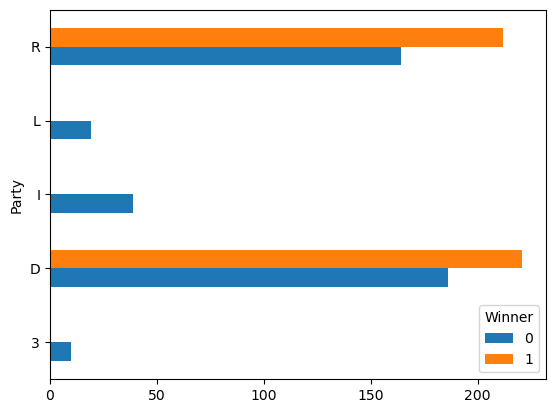

In [23]:
pd.crosstab(
    df['Party'],
    df['Winner']
).plot(kind="barh");

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


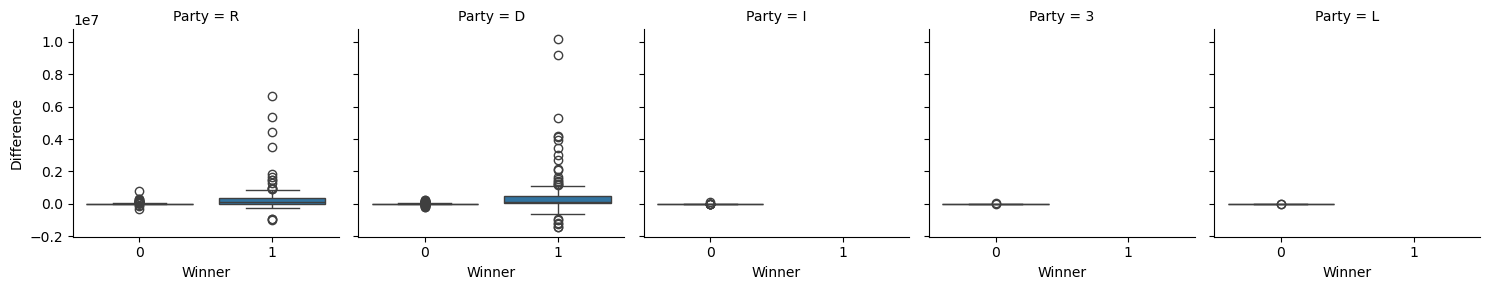

In [37]:
g = sns.FacetGrid(df, col='Party')
g.map(sns.boxplot, 'Winner', 'Difference')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


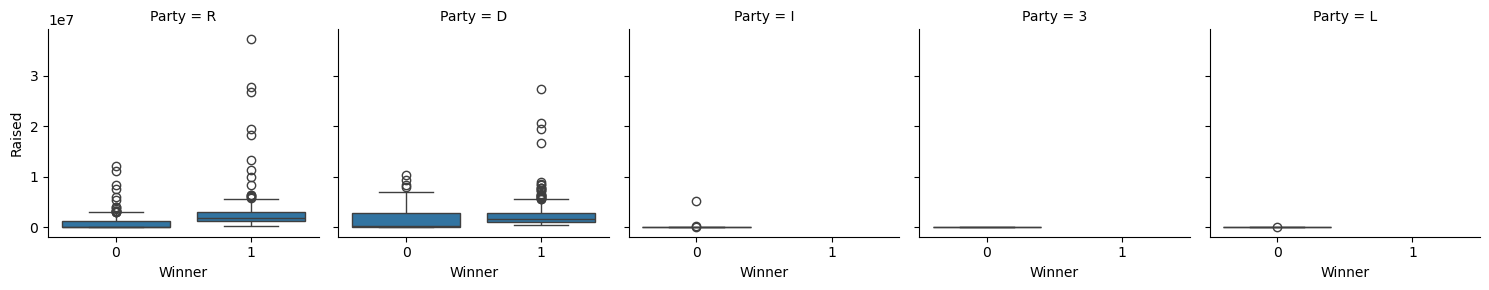

In [39]:
g = sns.FacetGrid(df, col='Party')
g.map(sns.boxplot, 'Winner', 'Raised')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


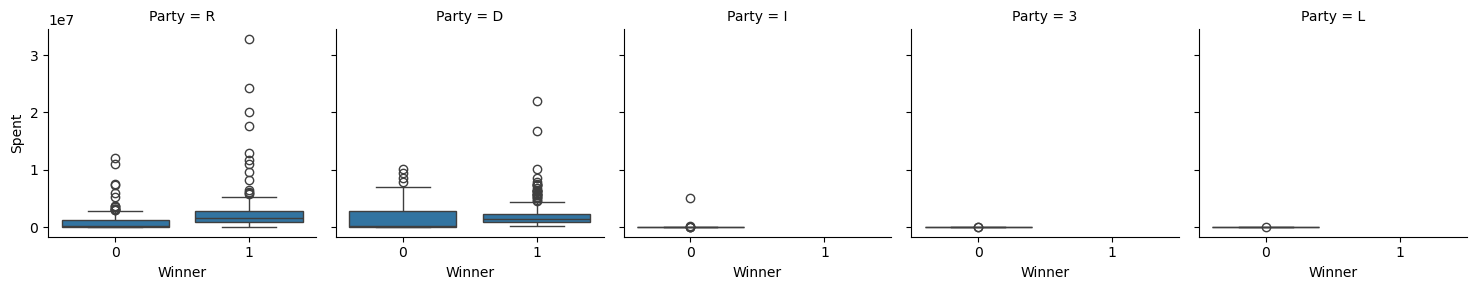

In [40]:
g = sns.FacetGrid(df, col='Party')
g.map(sns.boxplot, 'Winner', 'Spent')
plt.show()

In [ ]:
df_logreg = smf.logit("Winner ~ Spent", data = df).fit()

In [ ]:
df_logreg.params